In [1]:
!source feelings/bin/activate

In [2]:
!pip freeze

appnope==0.1.0
backcall==0.1.0
beautifulsoup4==4.8.2
certifi==2020.4.5
chardet==3.0.4
cssselect==1.1.0
cycler==0.10.0
DateTime==4.3
decorator==4.4.2
feedfinder2==0.0.4
feedparser==5.2.1
idna==2.9
ipykernel==5.2.0
ipython==7.13.0
ipython-genutils==0.2.0
jedi==0.16.0
jieba3k==0.35.1
jupyter-client==6.1.2
jupyter-core==4.6.3
kiwisolver==1.2.0
lxml==4.5.0
matplotlib==3.2.1
newspaper3k==0.2.8
nltk==3.4.5
numpy==1.18.2
pandas==1.0.3
parso==0.6.2
pexpect==4.8.0
pickleshare==0.7.5
Pillow==7.1.1
prompt-toolkit==3.0.5
ptyprocess==0.6.0
Pygments==2.6.1
pyparsing==2.4.6
python-dateutil==2.8.1
pytz==2019.3
PyYAML==5.3.1
pyzmq==19.0.0
requests==2.23.0
requests-file==1.4.3
six==1.14.0
soupsieve==2.0
textblob==0.15.3
tinysegmenter==0.3
tldextract==2.2.2
tornado==6.0.4
traitlets==4.3.3
urllib3==1.25.8
wcwidth==0.1.9
wordcloud==1.6.0
zope.interface==5.0.2


In [3]:
import pandas as pd
import numpy as np
import datetime

In [4]:
onCOV = pd.read_json("../TweetSearch/MillionSearchBroad/CoronaCovid.json", lines = True)

In [5]:
onCOV

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,2020-04-05 17:56:53+00:00,1246859367057698816,1246859367057698816,Fix ist: Fledermäuse spielen nicht nur bei Cor...,True,"{'hashtags': [{'text': 'fürstderfinsternis', '...","{'iso_language_code': 'de', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0,False,False,0.0,de,NaN,NaN,NaN,NaN,NaN
1,2020-04-05 17:56:52+00:00,1246859365405069312,1246859365405069312,"Marcos Antônio Vieira, de 36 anos, atuava na a...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""https://www.blog2social.com"" rel=""nof...",NaN,NaN,...,0,False,False,0.0,pt,NaN,NaN,NaN,NaN,NaN
2,2020-04-05 17:56:52+00:00,1246859365124116482,1246859365124116480,Top story: Navy Captain Removed From Carrier T...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.tweetedtimes.com"" rel=""no...",NaN,NaN,...,0,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2020-04-05 17:56:52+00:00,1246859363932950528,1246859363932950528,UPDATE [05.04-19:50] #Worldwide #Mondo AGGIORN...,True,"{'hashtags': [{'text': 'Worldwide', 'indices':...","{'iso_language_code': 'it', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,0,False,False,0.0,it,NaN,NaN,NaN,NaN,NaN
4,2020-04-05 17:56:51+00:00,1246859360724234243,1246859360724234240,@Dennis79502422 @washingtonpost Not sure what ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.246434e+18,1.246434e+18,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314302,2020-04-04 04:46:50+00:00,1246298157723467776,1246298157723467776,Help Animals Online During COVID-19 Quarantine...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
314303,2020-04-04 04:46:50+00:00,1246298156930723840,1246298156930723840,Meskipun di satu sisi Coronavirus membuat kepa...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,0,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
314304,2020-04-04 04:46:50+00:00,1246298155915907072,1246298155915907072,Miley and Cody Simpson donated groceries to so...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,207,False,False,0.0,en,"{'media': [{'id': 1246298105273876481, 'id_str...",NaN,NaN,NaN,NaN
314305,2020-04-04 04:46:49+00:00,1246298153147494400,1246298153147494400,'More and more' young people in ICU and dying ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,4,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN


In [6]:
from textblob import TextBlob

In [7]:
import nltk

In [8]:
from newspaper import Article

# Preprocessing

In [9]:
def preprocess(df):
    # only take those with english as language
    df = df[df["lang"]=="en"]
    lang = df["lang"]
    time = df['created_at'].values
    text = df['text']
    try:
        userlocation = [tweet.get('location') for tweet in df['user']]
    except:
        print(tweet)
        
    return pd.DataFrame({"time":time, "text":text, "lang":lang,  "userLocation":np.array(userlocation)})

In [10]:
res = preprocess(onCOV)

In [11]:
res

,time,text,lang,userLocation
2,2020-04-05 17:56:52,Top story: Navy Captain Removed From Carrier T...,en,"Finfinnee, Oromia, Africa"
4,2020-04-05 17:56:51,@Dennis79502422 @washingtonpost Not sure what ...,en,
6,2020-04-05 17:56:51,@seandanaher5 @xtophercook Man Britain made it...,en,"Johannesburg, South Africa"
9,2020-04-05 17:56:50,The Czech Republic is taking 6 serious Corona ...,en,"Prague, Czech Republic"
10,2020-04-05 17:56:50,Eradicate the virus – without a vaccine? Manag...,en,🌎 ❤️️ เt ๏г lєคשє เt 💫👽
...,...,...,...,...
314299,2020-04-04 04:46:53,Coronavirus: Will hot drinks protect you from ...,en,UK
314302,2020-04-04 04:46:50,Help Animals Online During COVID-19 Quarantine...,en,
314304,2020-04-04 04:46:50,Miley and Cody Simpson donated groceries to so...,en,Brasil
314305,2020-04-04 04:46:49,'More and more' young people in ICU and dying ...,en,"Birraranga, unceded land of the Kulin nations"


# Remove URLs

In [12]:
import re
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


In [13]:
res["text"] = [remove_url(tweet) for tweet in res['text']]

#Text Cleanup - Address Case Issues and split into words
words_in_tweet = [tweet.lower().split() for tweet in res["text"]]
words_in_tweet[0]

['top',
 'story',
 'navy',
 'captain',
 'removed',
 'from',
 'carrier',
 'tests',
 'positive',
 'for',
 'covid19',
 'see',
 'more']

# Counting top words

In [14]:
from nltk.corpus import stopwords
import itertools
import collections

In [15]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

#We need to remove stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

#I added some additional stop-words to accomodate pidgin
stop_words.update(['corona', 'coronavirus', 'virus', 'covid19','covid'])

tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

all_words_nsw = list(itertools.chain(*tweets_nsw))

#we use the counter again
counts_nsw = collections.Counter(all_words_nsw)

#Top ten most used words
counts_nsw.most_common(20)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/luischavesrodriguez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('people', 11427),
 ('cases', 8417),
 ('us', 7867),
 ('new', 7392),
 ('via', 5685),
 ('amp', 5515),
 ('pandemic', 5474),
 ('news', 5161),
 ('fight', 5089),
 ('like', 5089),
 ('one', 5018),
 ('world', 4887),
 ('dont', 4518),
 ('get', 4513),
 ('trump', 4390),
 ('deaths', 4194),
 ('health', 4107),
 ('positive', 4036),
 ('help', 3954),
 ('india', 3927)]

# What people are taling most about (excluding corona, coronavirus, virus, covid19, covid)

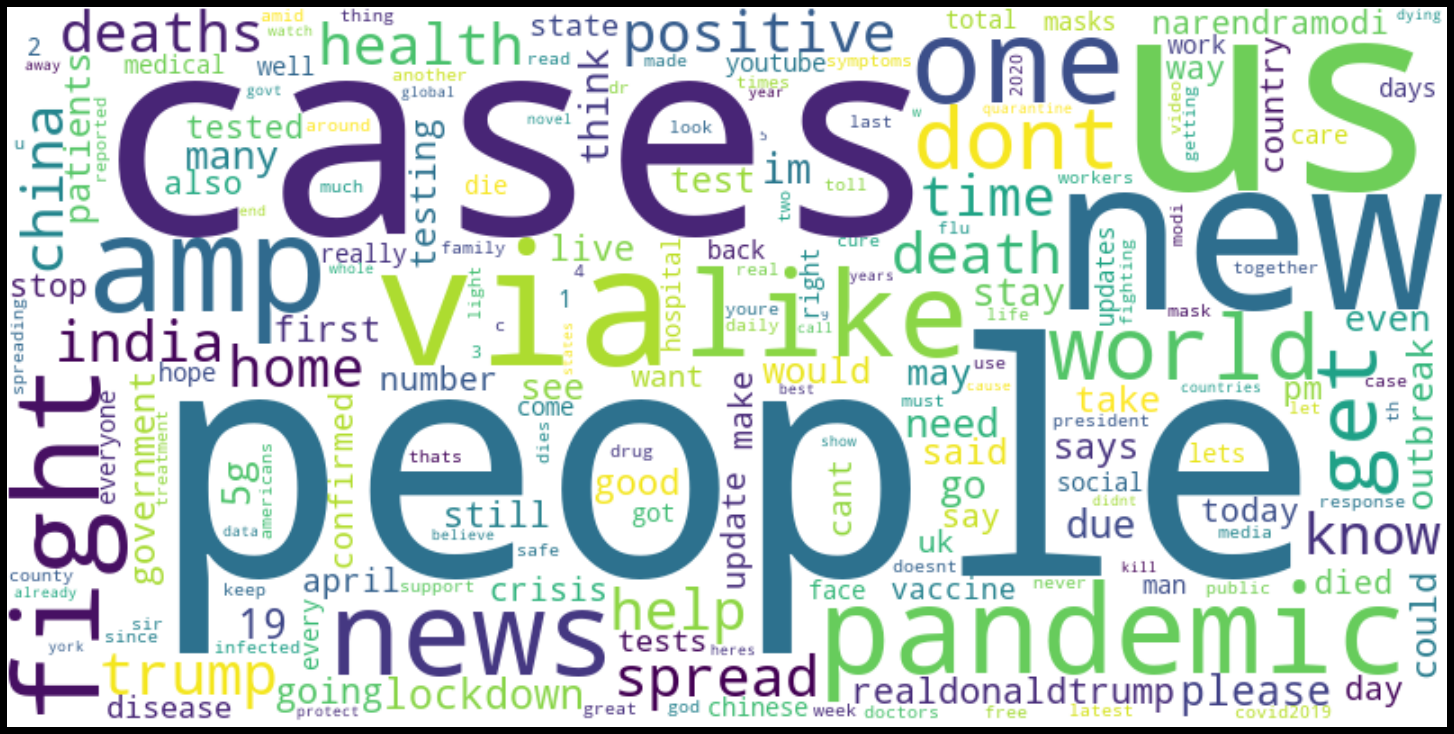

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=180,max_words=200,stopwords=stop_words,background_color="white",
                      width=800, height=400).fit_words(counts_nsw)

# Display the generated image:
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
